<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/0530_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

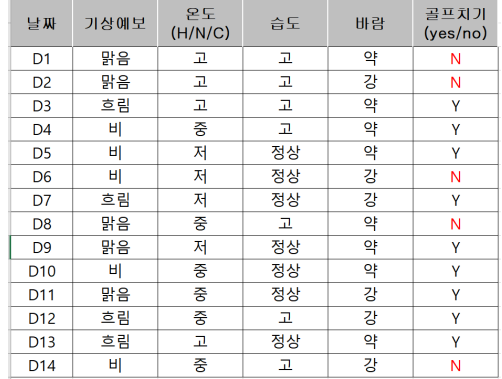

In [5]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data = np.array([[0,0,0,0,0],
                [0,0,0,1,0],
                [1,0,0,0,1],
                [2,1,0,0,1],
                [2,2,1,0,1],
                [2,2,1,1,0],
                [1,2,1,1,1],
                [0,1,0,0,0],
                [0,2,1,0,1],
                [2,1,1,0,1],
                [0,1,1,1,1],
                [1,1,0,1,1],
                [1,0,1,0,1],
                [2,1,0,1,0]])
X = data[:,0:4]
y = data[:,4]


In [6]:
# 엔트로피 함수
def entropy(y):
    n = len(y)
    if n == 0:
        return 0
    p1 = np.sum(y == 1) / n
    p0 = np.sum(y == 0) / n
    e = 0
    if p1 > 0:
        e -= p1 * np.log2(p1)
    if p0 > 0:
        e -= p0 * np.log2(p0)
    return e

# 전체 엔트로피
entropy_total = entropy(y)
print(f"전체 집합의 엔트로피: {entropy_total:.4f}")

# 각 feature별 정보이득 계산
feature_names = ['기상예보', '온도', '습도', '바람']
for feature_idx in range(X.shape[1]):
    values = np.unique(X[:, feature_idx])
    weighted_entropy = 0
    for val in values:
        mask = X[:, feature_idx] == val
        sub_entropy = entropy(y[mask])
        weighted_entropy += (np.sum(mask) / len(y)) * sub_entropy
    info_gain = entropy_total - weighted_entropy
    print(f"{feature_names[feature_idx]}의 정보이득: {info_gain:.4f}")

전체 집합의 엔트로피: 0.9403
기상예보의 정보이득: 0.2467
온도의 정보이득: 0.0292
습도의 정보이득: 0.1518
바람의 정보이득: 0.0481


In [10]:
root_feature_idx = 0  # 기상예보를 뿌리노드로 할 경우

# 기상예보(맑음/흐림/비) 별로 subset 나눔
for weather in np.unique(X[:, root_feature_idx]):
    subset_mask = X[:, root_feature_idx] == weather
    X_sub = X[subset_mask]
    y_sub = y[subset_mask]
    print(f"\n[기상예보={weather}] subset ({len(y_sub)}개):")
    # 해당 subset의 엔트로피
    ent_sub = entropy(y_sub)
    print(f"  subset 엔트로피: {ent_sub:.4f}")

    # 나머지 feature(온도/습도/바람) 정보이득 계산
    for feature_idx in range(X.shape[1]):
        if feature_idx == root_feature_idx:
            continue  # 뿌리노드는 제외
        values = np.unique(X_sub[:, feature_idx])
        weighted_entropy = 0
        for val in values:
            mask = X_sub[:, feature_idx] == val
            sub_entropy = entropy(y_sub[mask])
            weighted_entropy += (np.sum(mask) / len(y_sub)) * sub_entropy
        info_gain = ent_sub - weighted_entropy
        print(f"    {feature_names[feature_idx]}의 정보이득: {info_gain:.4f}")



[기상예보=0] subset (5개):
  subset 엔트로피: 0.9710
    Temp의 정보이득: 0.5710
    Humidity의 정보이득: 0.9710
    Wind의 정보이득: 0.0200

[기상예보=1] subset (4개):
  subset 엔트로피: 0.0000
    Temp의 정보이득: 0.0000
    Humidity의 정보이득: 0.0000
    Wind의 정보이득: 0.0000

[기상예보=2] subset (5개):
  subset 엔트로피: 0.9710
    Temp의 정보이득: 0.0200
    Humidity의 정보이득: 0.0200
    Wind의 정보이득: 0.9710


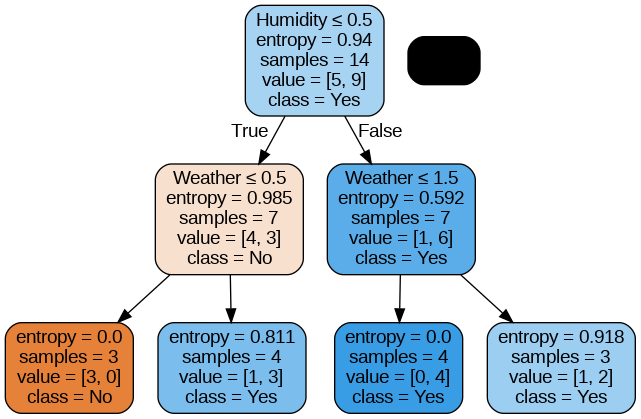

In [13]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display

# Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf = clf.fit(X, y)

feature_names = ['Weather', 'Temp', 'Humidity', 'Wind']
class_names = ['No', 'Yes']

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(graph.create_png())
display(img)
